In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from prince import CA

Importation des bases de données

In [4]:
regions2014 = pd.read_csv("https://fxjollois.github.io/donnees/regions-csp/regions-csp-2014.csv",
                              index_col = "Région")
regions2014.head()

,Agriculteurs Actifs ayant un emploi RP2014,Agriculteurs Chômeurs RP2014,"Artisans, commerçants, chefs d'entreprise Actifs ayant un emploi RP2014","Artisans, commerçants, chefs d'entreprise Chômeurs RP2014",Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP2014,Cadres et professions intellectuelles supérieures Chômeurs RP2014,Professions intermédiaires Actifs ayant un emploi RP2014,Professions intermédiaires Chômeurs RP2014,Employés Actifs ayant un emploi RP2014,Employés Chômeurs RP2014,Ouvriers Actifs ayant un emploi RP2014,Ouvriers Chômeurs RP2014
Région,,,,,,,,,,,,
Île-de-France,3373.297125,195.053895,203747.801541,17112.882402,1.287917e+06,61943.340704,1.095707e+06,120136.339854,1.017211e+06,171489.384828,521635.119285,112144.255513
Centre-Val de Loire,13731.136316,164.913387,47577.256270,3168.849596,1.087993e+05,4139.710087,2.100894e+05,16730.919522,2.187664e+05,32895.248697,184516.579228,36237.921528
Bourgogne-Franche-Comté,20314.763142,177.683361,53729.925925,3471.206196,1.053460e+05,3894.747983,2.218569e+05,17036.689778,2.271630e+05,34036.105976,219598.002062,42277.992665
Normandie,19265.892020,162.360831,61807.703240,4309.923695,1.257314e+05,4575.836184,2.655183e+05,21068.120831,2.796448e+05,47312.820231,250432.208276,50014.556203
Hauts-de-France,17767.070961,184.594238,87398.160828,8462.259655,2.480851e+05,9086.003241,4.721263e+05,42533.984972,4.992887e+05,98340.151953,436388.567456,118181.606481


In [5]:
# Choisir quelques lignes
regions2014_bis = regions2014[regions2014.columns[::2]]
regions2014_bis

,Agriculteurs Actifs ayant un emploi RP2014,"Artisans, commerçants, chefs d'entreprise Actifs ayant un emploi RP2014",Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP2014,Professions intermédiaires Actifs ayant un emploi RP2014,Employés Actifs ayant un emploi RP2014,Ouvriers Actifs ayant un emploi RP2014
Région,,,,,,
Île-de-France,3373.297125,203747.801541,1.287917e+06,1.095707e+06,1.017211e+06,521635.119285
Centre-Val de Loire,13731.136316,47577.256270,1.087993e+05,2.100894e+05,2.187664e+05,184516.579228
Bourgogne-Franche-Comté,20314.763142,53729.925925,1.053460e+05,2.218569e+05,2.271630e+05,219598.002062
Normandie,19265.892020,61807.703240,1.257314e+05,2.655183e+05,2.796448e+05,250432.208276
Hauts-de-France,17767.070961,87398.160828,2.480851e+05,4.721263e+05,4.992887e+05,436388.567456
Grand Est,25048.025285,90645.318151,2.395307e+05,4.502691e+05,4.775704e+05,432458.415829
Pays de la Loire,28429.581400,72190.709650,1.664224e+05,3.103254e+05,3.044966e+05,288689.509344
Bretagne,27348.911435,67631.838365,1.451345e+05,2.675298e+05,2.689434e+05,231276.372857
Nouvelle-Aquitaine,46101.749747,135543.550137,2.390354e+05,4.578087e+05,5.023389e+05,378054.257472


# Réalisation de l'AFC

In [6]:
regions2014_bis.shape

(13, 6)

In [7]:
ca = CA(n_components = 5) # minimum du nombre de modalités - 1 (soit 5-1 )
ca.fit(regions2014_bis)

Les variables propres

In [8]:
print(ca.eigenvalues_)
print(ca.total_inertia_)
print(ca.percentage_of_variance_) # CHANGEMENT ICI

[3.91706712e-02 4.53723542e-03 1.71626036e-03 2.79989613e-04
 6.10037335e-05]
0.04576516031761322
[85.59059099  9.91416919  3.75014607  0.61179642  0.13329732]


In [9]:
eig = pd.DataFrame(
    { 
        "Dimension" : ["Dim" + str(x + 1) for x in range(5)],
        "% variance expliquée": np.round(ca.percentage_of_variance_, 4) * 100,
        "% variance expliquée cumulée": np.round(np.cumsum(ca.percentage_of_variance_), 4) * 100,
    }
)
eig

,Dimension,% variance expliquée,% variance expliquée cumulée
0,Dim1,8559.06,8559.06
1,Dim2,991.42,9550.48
2,Dim3,375.01,9925.49
3,Dim4,61.18,9986.67
4,Dim5,13.33,10000.00


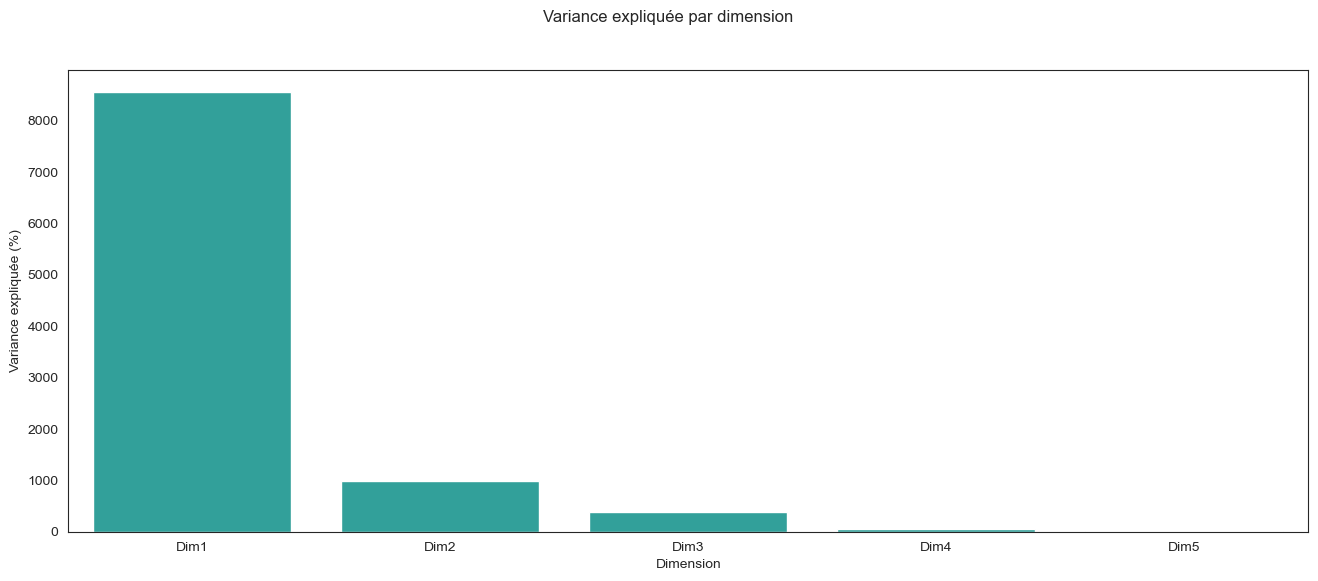

In [10]:
plt.figure(figsize=(16, 6))
g_eig = sns.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

# Représentation des lignes sur les deux premiers axes 

In [12]:
df_row = pd.DataFrame(ca.row_coordinates(regions2014_bis)).rename(columns = {0: "Dim1", 1: "Dim2", 2:"Dim3", 3:"Dim4", 4:"Dim5"})
df_row

,Dim1,Dim2,Dim3,Dim4,Dim5
Région,,,,,
Île-de-France,0.369486,-0.022848,-0.010024,-0.005585,-0.001163
Centre-Val de Loire,-0.127766,-0.032366,0.010728,-0.003914,0.007992
Bourgogne-Franche-Comté,-0.196114,-0.037631,-0.036210,0.003215,-0.014343
Normandie,-0.173247,-0.040664,0.005590,-0.003111,-0.001535
Hauts-de-France,-0.114429,-0.099800,0.052900,-0.004739,0.010720
Grand Est,-0.133436,-0.085459,0.019473,-0.008175,-0.001927
Pays de la Loire,-0.147621,-0.031708,-0.055612,0.008078,-0.007281
Bretagne,-0.136562,0.015362,-0.062942,-0.004990,0.002588
Nouvelle-Aquitaine,-0.141623,0.066359,-0.025813,-0.024822,-0.002041


c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x600 with 0 Axes>

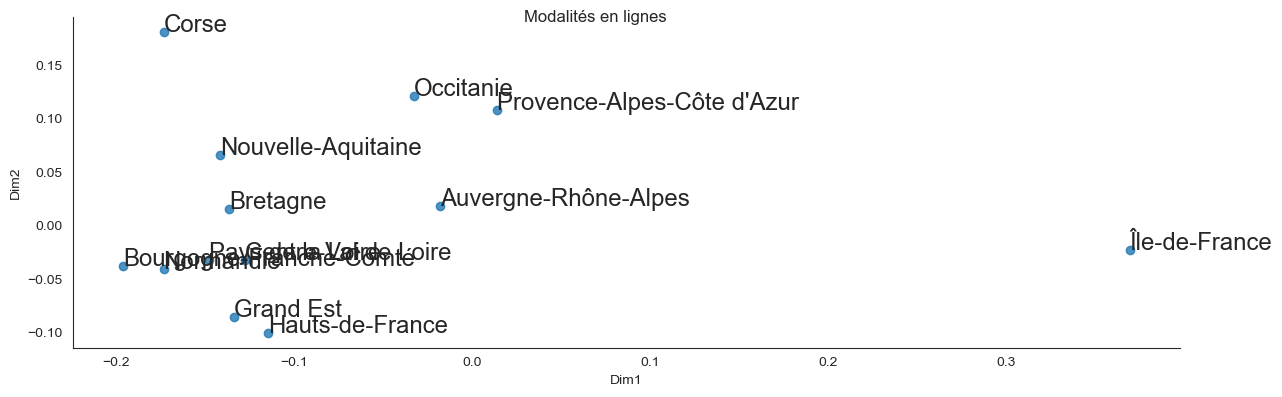

In [13]:
plt.figure(figsize=(16, 6))
g_row = sns.lmplot(x = "Dim1", y = "Dim2", data = df_row, fit_reg = False, 
                       height = 4, aspect = 3)
g_row.fig.suptitle("Modalités en lignes")
for i in df_row.index:
    plt.text(df_row.loc[i].Dim1, df_row.loc[i].Dim2, i, size = "xx-large")
plt.show()

## Représentation des colonnes pour deux premiers axes factoriels

In [14]:
df_col = pd.DataFrame(ca.column_coordinates(regions2014_bis)).rename(columns = {0: "Dim1", 1: "Dim2", 2:"Dim3", 3:"Dim4", 4:"Dim5"})
df_col

,Dim1,Dim2,Dim3,Dim4,Dim5
Agriculteurs Actifs ayant un emploi RP2014,-0.513504,0.188153,-0.281331,-0.034067,0.010921
"Artisans, commerçants, chefs d'entreprise Actifs ayant un emploi RP2014",-0.083224,0.187898,0.026932,0.019605,-0.017221
Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP2014,0.369075,-0.018562,-0.030539,-0.003322,-0.004480
Professions intermédiaires Actifs ayant un emploi RP2014,0.001364,0.006711,0.003987,0.018832,0.009410
Employés Actifs ayant un emploi RP2014,-0.042499,0.017458,0.033610,-0.022568,0.002694
Ouvriers Actifs ayant un emploi RP2014,-0.216488,-0.089103,-0.010502,0.004476,-0.007373


c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


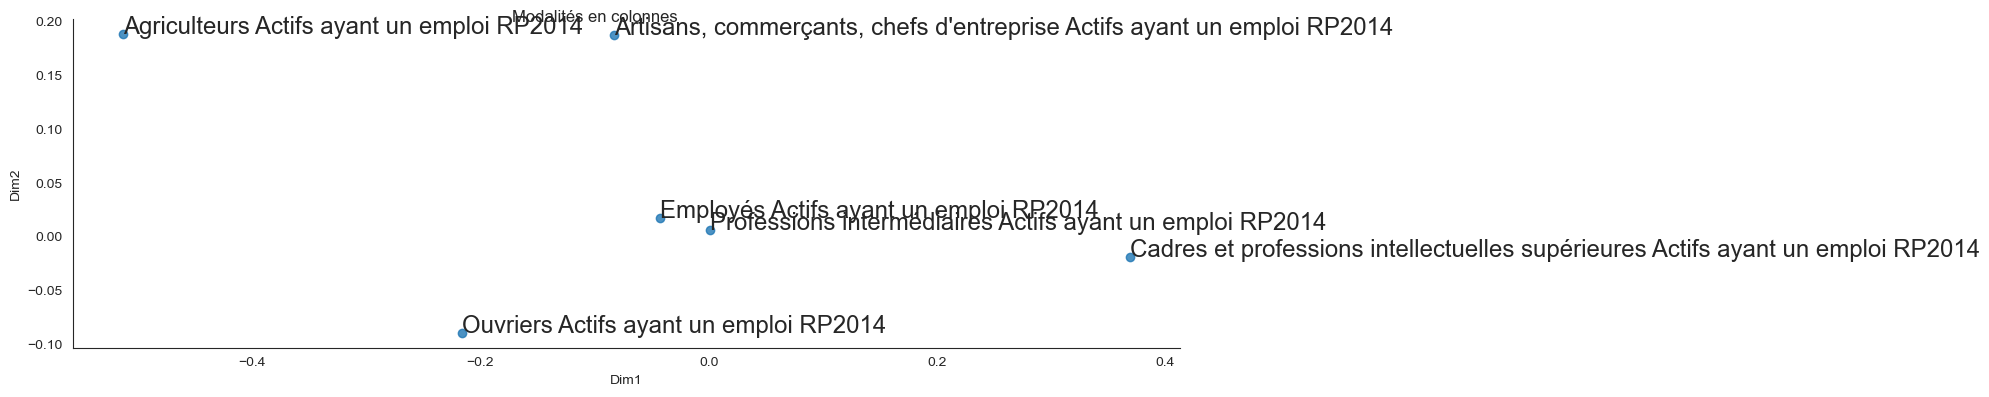

In [15]:
g_col = sns.lmplot(x = "Dim1", y = "Dim2", data = df_col, fit_reg = False, 
                       height = 4, aspect = 3)
g_col.fig.suptitle("Modalités en colonnes")
for i in df_col.index:
    plt.text(df_col.loc[i].Dim1, df_col.loc[i].Dim2, i, size = "xx-large")
plt.show()

# Représentation simultanée

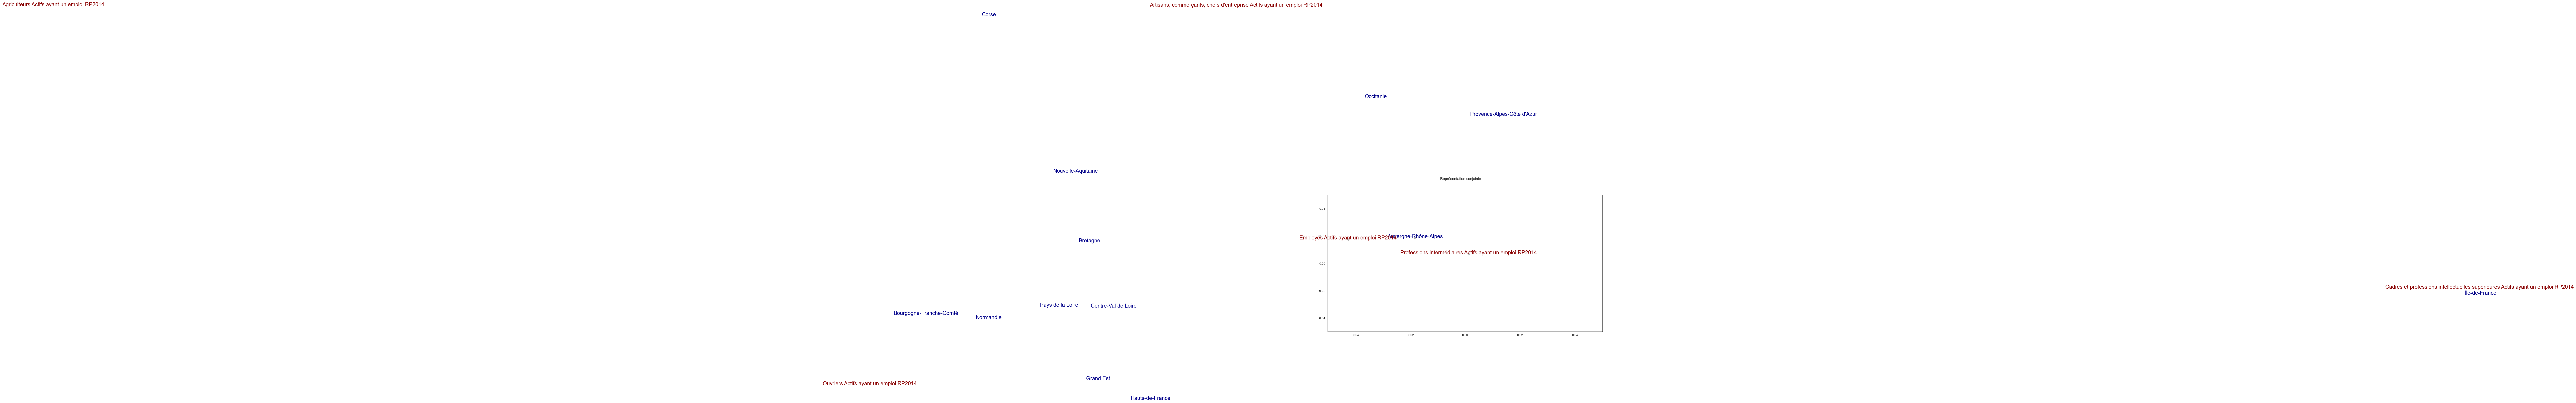

In [25]:
fig = plt.figure(figsize = (16,8))
plt.xlim(-.05, .05)
plt.ylim(-.05, .05)

for i in df_row.index:
    plt.scatter(df_row.loc[i].Dim1, df_row.loc[i].Dim2, alpha = .25, c = "black")
    plt.text(df_row.loc[i].Dim1, df_row.loc[i].Dim2, i, size = "xx-large", color = "darkblue", ha = "center")

for i in df_col.index:
    plt.scatter(df_col.loc[i].Dim1, df_col.loc[i].Dim2, alpha = .25, c = "black")
    plt.text(df_col.loc[i].Dim1, df_col.loc[i].Dim2, i, size = "xx-large", color = "darkred", ha = "center")

fig.suptitle("Représentation conjointe")
plt.show()

# Importance de chaque modalité

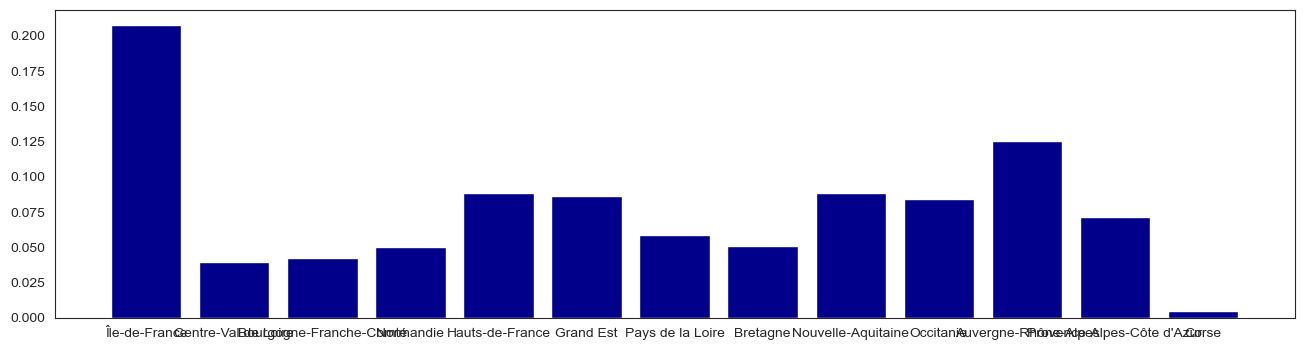

In [27]:
plt.figure(figsize = (16, 4))
plt.bar(regions2014_bis.index, ca.row_masses_, color = "darkblue")
plt.show()

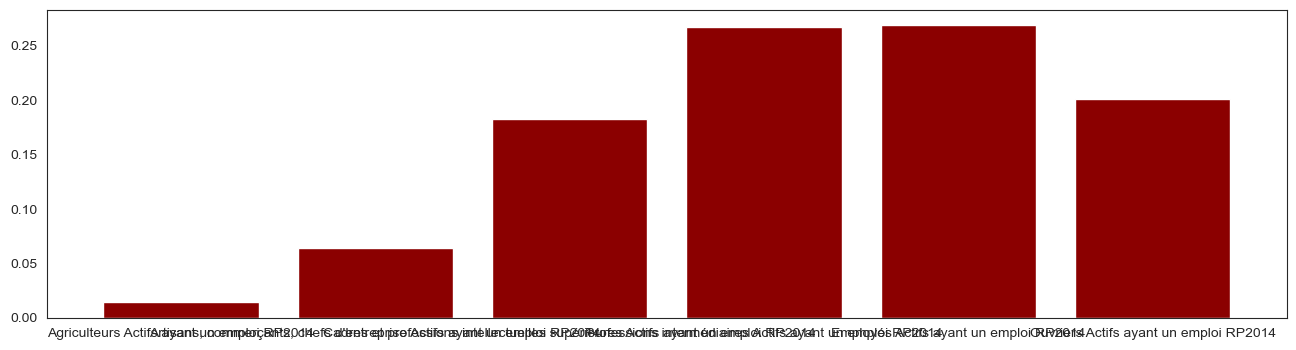

In [28]:
plt.figure(figsize = (16, 4))
plt.bar(regions2014_bis.columns, ca.col_masses_, color = "darkred")
plt.show()

# Profils lignes

In [33]:
p_row = regions2014_bis.div(regions2014_bis.sum(axis=1), axis=0).round(4) * 100
p_row

,Agriculteurs Actifs ayant un emploi RP2014,"Artisans, commerçants, chefs d'entreprise Actifs ayant un emploi RP2014",Cadres et professions intellectuelles supérieures Actifs ayant un emploi RP2014,Professions intermédiaires Actifs ayant un emploi RP2014,Employés Actifs ayant un emploi RP2014,Ouvriers Actifs ayant un emploi RP2014
Région,,,,,,
Île-de-France,0.08,4.93,31.19,26.53,24.63,12.63
Centre-Val de Loire,1.75,6.07,13.89,26.81,27.92,23.55
Bourgogne-Franche-Comté,2.40,6.34,12.42,26.16,26.79,25.90
Normandie,1.92,6.17,12.54,26.49,27.90,24.98
Hauts-de-France,1.01,4.96,14.09,26.81,28.35,24.78
Grand Est,1.46,5.28,13.96,26.25,27.84,25.21
Pays de la Loire,2.43,6.17,14.22,26.51,26.01,24.66
Bretagne,2.71,6.71,14.40,26.54,26.68,22.95
Nouvelle-Aquitaine,2.62,7.71,13.59,26.03,28.56,21.49


In [ ]:
fig = plt.figure(figsize = (16, 8))
base = np.zeros(6)
for m in p_row.columns:
    plt.bar(p_row.index, p_row[m], bottom = base, label = m)
    base = base + p_row[m]
plt.margins(0.05, 0.15)
plt.legend(ncol = 6, loc = 9)
plt.show()

# Profil colonne

In [ ]:
p_col = regions2014_bis.div(regions2014_bis.sum(axis=0), axis=1).round(4) * 100
fig = plt.figure(figsize = (16, 8))
base = np.zeros(12)
for m in p_col.index:
    plt.bar(p_col.columns, p_col.loc[m], bottom = base, label = m)
    base = base + p_col.loc[m]
plt.margins(0.05, 0.15)
plt.legend(ncol = 6, loc = 9)
plt.show()